## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

# 2.
I chose these 12 variables from the General Social Survey (GSS) because I believe they collectively provide a strong foundation for understanding how core demographic traits, social contexts, and personal outlooks interact over time in the United States. First, I included year so that I can track changes or trends longitudinally. One of the greatest strengths of the GSS is its repeated cross-sectional design, which spans several decades; the year variable lets me compare attitudes, demographics, and outcomes across different historical moments. Next, I selected age because generational differences often play a major role in shaping perspectives on politics, religion, and personal well-being. By comparing younger and older respondents, I can explore how life experiences shift over the lifespan and across different cohorts. I also included sex and race, as these core demographic markers are vital for understanding how societal structures and opportunities vary for different groups. Whether analyzing disparities in income, happiness, or political attitudes, being able to split data by sex and race provides crucial insight into the lived realities of diverse populations in the U.S.

I added educ, which indicates years or levels of schooling, because education remains one of the strongest predictors of economic outcomes, political behavior, and social attitudes. It is critical to see whether higher education levels correlate with shifts in worldview, religious participation, or self-reported happiness. Closely related, I chose realinc, which provides inflation-adjusted personal income. Looking at how education intersects with income is key to understanding socioeconomic status and material well-being, especially over time. In parallel, marital status allows me to consider how romantic relationships and family structures might influence other variables, such as happiness or political leanings. Marriage, divorce, and singlehood can all significantly shape an individual’s support networks, financial stability, and day-to-day experiences, so I wanted this factor in my dataset.

I also included region, so I can capture geographic and cultural variation within the United States. Different parts of the country often exhibit distinct political norms, religious traditions, and economic conditions, so region can shed light on those regional patterns. To delve further into politics, I selected both polviews and partyid, because they speak to a person’s ideological orientation (from liberal to conservative) and partisan identity (from Democrat to Republican, or something else). Political ideology and party affiliation are central to many discussions of social attitudes, voting behavior, and policy preferences, so having these variables gives me a clear sense of how respondents position themselves within the broader political landscape.

Religion is another cornerstone of American life, so I kept relig to understand denominational preferences. Religion frequently shapes moral views, political stances, and community engagement, making it a valuable dimension to compare alongside other demographic traits and opinions. Finally, I included happy as a self-reported measure of overall well-being. It is fascinating to see how people’s subjective sense of happiness might differ by age, sex, marital status, or region. Taken together, these 12 variables allow me to explore how fundamental characteristics—such as demographic background, socioeconomic status, religious affiliation, and political orientation—relate to personal happiness and change across different points in time. By narrowing the vast GSS database down to these specific measures, I can conduct more focused analyses on key sociological and political questions, while still tapping into the unique longitudinal richness and representative power of the GSS itself.

In [20]:
#  3. Data Cleaning


#Convert relevant string-based columns to 'category' for efficiency and clarity
cat_cols = ['sex', 'race', 'marital', 'region', 'polviews', 'partyid', 'relig', 'happy']
for col in cat_cols:
    if col in gss_df.columns and gss_df[col].notnull().sum() > 0:
        gss_df[col] = gss_df[col].astype('category')

# Filter out any impossible or unreasonable age values (example: < 18 or > 100)
#    The GSS typically surveys adults 18+, but older waves may vary
gss_df = gss_df[(gss_df['age'] >= 18) & (gss_df['age'] <= 100)]

# Drop any exact duplicates that might exist across chunks
gss_df.drop_duplicates(inplace=True)

# Verify the shape of the cleaned dataset
print("Shape after cleaning:", gss_df.shape)
# look at the first 5 rows of the cleaned dataset
gss_df.head()



Shape after cleaning: (71606, 12)


,year,age,sex,race,educ,marital,realinc,region,polviews,partyid,relig,happy
0,1972,23.0,female,white,16.0,never married,18951.0,east north central,NaN,"independent, close to democrat",jewish,not too happy
1,1972,70.0,male,white,10.0,married,24366.0,east north central,NaN,not very strong democrat,catholic,not too happy
2,1972,48.0,female,white,12.0,married,24366.0,east north central,NaN,"independent (neither, no response)",protestant,pretty happy
3,1972,27.0,female,white,17.0,married,30458.0,east north central,NaN,not very strong democrat,other,not too happy
4,1972,61.0,female,white,12.0,married,50763.0,east north central,NaN,strong democrat,protestant,pretty happy


Descriptive Statistics for Numerical Columns:

               year           age          educ        realinc
count  71606.000000  71606.000000  71414.000000   64508.000000
mean    1997.552077     46.555791     13.024113   32498.838598
std       15.027716     17.600505      3.180488   30819.257285
min     1972.000000     18.000000      0.000000     218.000000
25%     1985.000000     32.000000     12.000000   12080.625000
50%     1998.000000     44.000000     12.000000   24139.000000
75%     2010.000000     60.000000     16.000000   40756.500000
max     2022.000000     89.000000     20.000000  162607.000000

Age Distribution (Histogram):


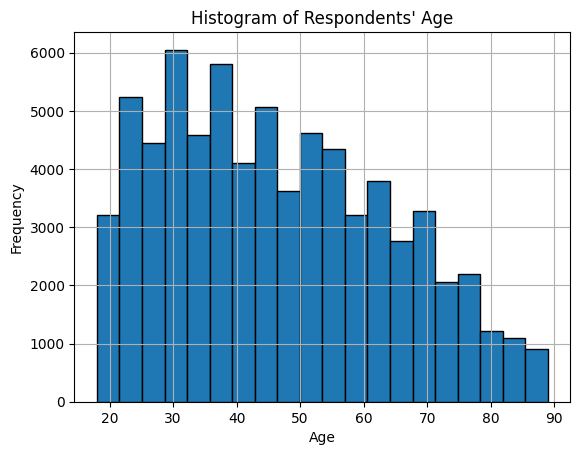


Political Views Distribution (Bar Chart):


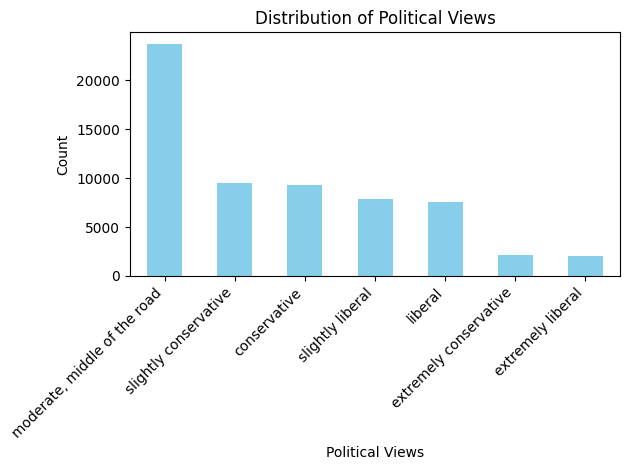

In [21]:
# 4. Basic EDA: Numeric Summaries and Visualizations 

import matplotlib.pyplot as plt

# Numeric Summaries
print("Descriptive Statistics for Numerical Columns:\n")
print(gss_df[['year','age','educ','realinc']].describe())

#visualization of distribution of age
print("\nAge Distribution (Histogram):")
gss_df['age'].hist(bins=20, edgecolor='black')
plt.title('Histogram of Respondents\' Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Bar Chart of Political Views
print("\nPolitical Views Distribution (Bar Chart):")
gss_df['polviews'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Political Views')
plt.xlabel('Political Views')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/vw/8l_c41_s7kzcypm113vm72ww0000gn/T/ipykernel_34887/2202330584.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gss_df, x='marital', order=gss_df['marital'].value_counts().index, palette='Set2')


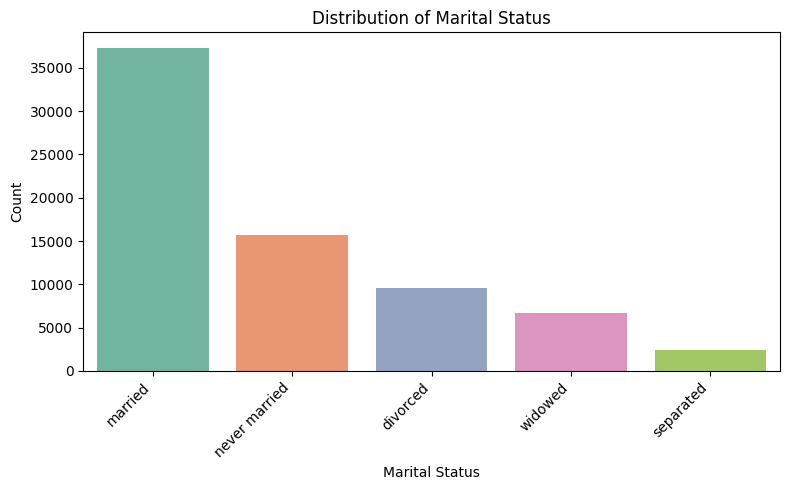

In [22]:
#Count of each marital status category
plt.figure(figsize=(8, 5))
sns.countplot(data=gss_df, x='marital', order=gss_df['marital'].value_counts().index, palette='Set2')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/vw/8l_c41_s7kzcypm113vm72ww0000gn/T/ipykernel_34887/2816449700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gss_df, x='sex', y='realinc', palette='coolwarm')


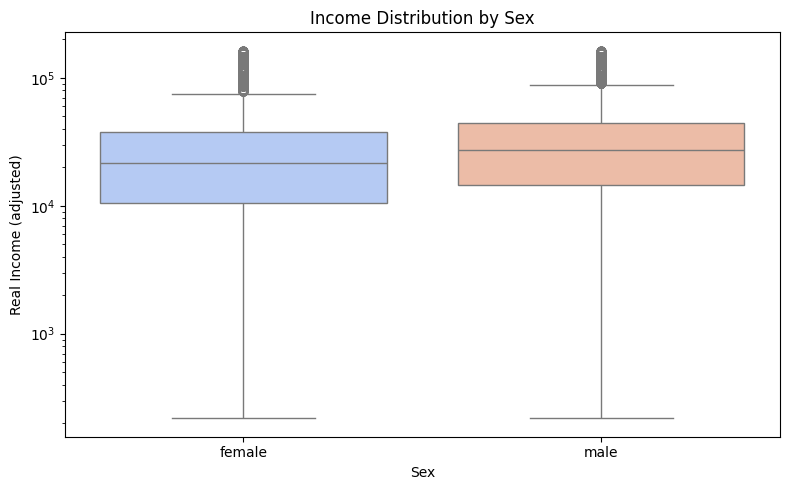

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=gss_df, x='sex', y='realinc', palette='coolwarm')
plt.title('Income Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Real Income (adjusted)')
plt.yscale('log')  #use a log scale since there are big income ranges
plt.tight_layout()
plt.show()


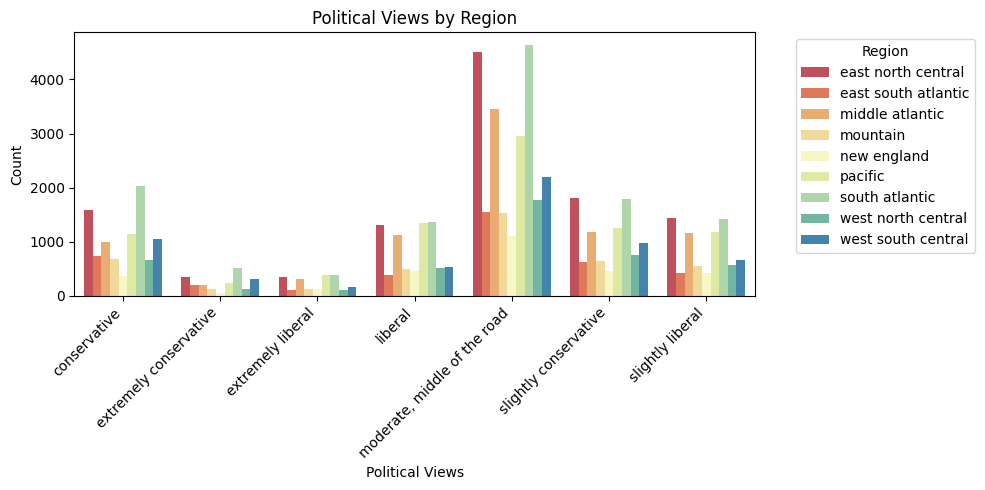

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(data=gss_df, x='polviews', hue='region', palette='Spectral')
plt.title('Political Views by Region')
plt.xlabel('Political Views')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


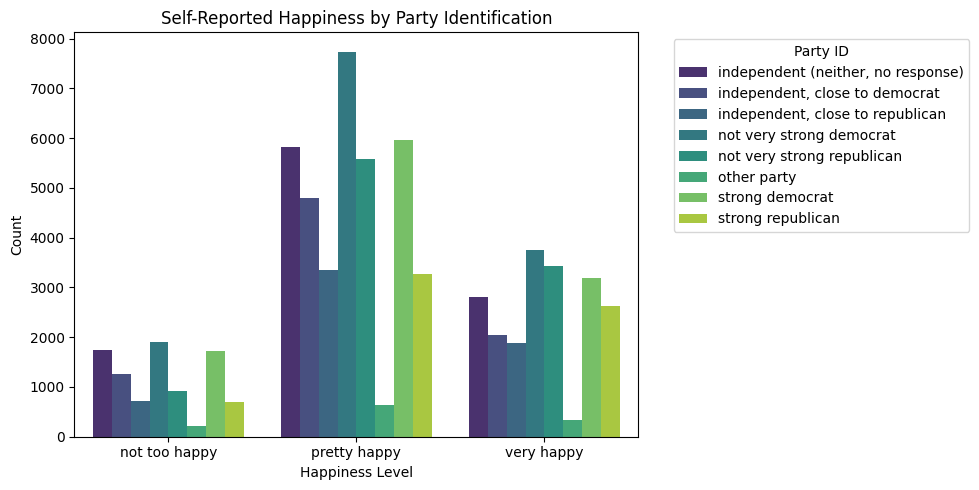

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(data=gss_df, x='happy', hue='partyid', palette='viridis',
              order=['not too happy','pretty happy','very happy'])
plt.title('Self-Reported Happiness by Party Identification')
plt.xlabel('Happiness Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Party ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


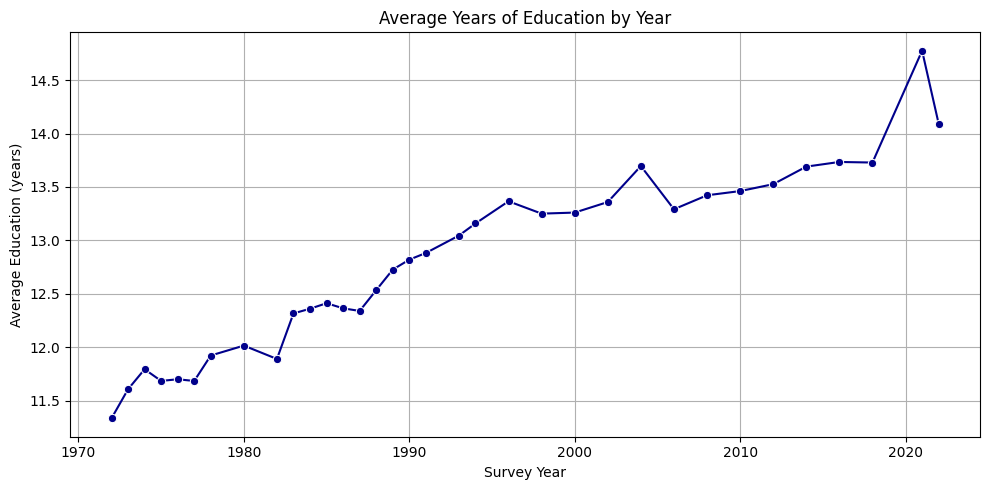

In [26]:
# First, group the data by 'year' and calculate mean 'educ'
mean_educ_by_year = gss_df.groupby('year')['educ'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=mean_educ_by_year, x='year', y='educ', marker='o', color='darkblue')
plt.title('Average Years of Education by Year')
plt.xlabel('Survey Year')
plt.ylabel('Average Education (years)')
plt.grid(True)
plt.tight_layout()
plt.show()


# 5.
I started by generating a descriptive statistics table for the numeric variables in my dataset: year, age, educ, and realinc. This was the first step in getting a sense of the data and making sure everything looked good. Right away, I noticed that my dataset spans from 1972 to 2022, meaning I have 50 years of social trends to work with. The average survey year is around 1997, which means a lot of responses are clustered in the mid-90s, but the standard deviation of about 15 shows that the data is still fairly spread out. I was also glad to see that my cleaned dataset includes over 71,000 rows for some variables, which means I have plenty of data to work with when looking at different relationships.

Looking at age, the average respondent is about 46.6 years old, which makes sense since the GSS mostly surveys working-age adults. The youngest respondent in my dataset is 18, and the oldest is 89. I set this range intentionally by removing anyone younger or older to keep the focus on adults. Technically, there are GSS respondents older than 90, but I decided that including them wouldn’t add much value since there are so few of them and they could complicate some analyses. With a standard deviation of 17.6, my dataset includes a wide range of adults at different life stages, from younger millennials to older retirees.

For education, I found that the average respondent has 13.0 years of schooling, which is one year beyond a high school diploma. This suggests that many GSS participants have attended at least some college. Looking at the quartiles, half of the respondents have exactly 12 years of schooling, while a quarter have 16 years, meaning they completed a four-year college degree. The maximum is 20 years, which likely represents people who went on to get master's degrees, doctorates, or other professional certifications. These numbers confirm a broader trend of increasing education levels in the U.S. over time, with more people pursuing higher education.

When I looked at income, things got more interesting. The average inflation-adjusted personal income (realinc) is around $32,498, but it ranges from just a few hundred dollars to over $160,000. Income data is usually skewed, so looking at just the mean or median does not tell the whole story. The standard deviation of over $30,000 highlights the level of income inequality in the dataset, which reflects broader economic disparities in the U.S. The number of valid responses for realinc is around 64,500, which is lower than the counts for age and year, probably due to some missing or non-reported responses. Even so, this is still a strong dataset for looking at income trends.

To get a better sense of the age distribution, I created a histogram. The largest number of respondents are in their late 20s and 30s, and the counts gradually decrease from middle age into the 70s and 80s. This is pretty typical for a broad adult sample in the U.S. Younger adults are more likely to be surveyed because they are still in the workforce or education system, while older adults become less common due to a shrinking population and lower survey participation rates.

What stood out to me was that the histogram has a smooth decline through the 70s and 80s, rather than any sudden drop-offs that could indicate sampling issues. Even though I removed respondents over 90, I still have a good number of seniors in their 70s and 80s, which means I can still explore how older Americans think about politics, religion, or happiness.

Next, I examined political ideology by generating a bar chart of the polviews variable. This is a seven-point scale ranging from “extremely liberal” to “extremely conservative.” The most common response, by a wide margin, was “moderate, middle of the road,” which is not surprising. A lot of Americans prefer to identify as moderate, even if their specific policy views lean in one direction. The second and third most frequent responses were “slightly conservative” and “conservative,” with “slightly liberal” and “liberal” not too far behind. The extremes—“extremely liberal” and “extremely conservative”—were the smallest but still had a presence.These results suggest that while political polarization is a big topic in public discourse, a large portion of Americans still prefer not to strongly align with one side. That said, there is still plenty of variation in political identity, which means I can dig deeper into how factors like age, income, and education influence these views. Since the GSS has collected this data over multiple decades, I could also track whether “moderate” has always been the dominant category or if more people have shifted toward stronger partisan identities in recent years.

Since family structure is closely tied to work, income, and well-being, I also looked at the distribution of marital status. The bar chart showed that “married” is by far the largest category, with over 35,000 respondents identifying as married at the time of the survey. “Never married” was the second most common, with around 15,000 respondents. The remaining categories—“divorced,” “widowed,” and “separated”—made up smaller but still noticeable portions of the dataset. This distribution reflects both traditional societal norms and changing trends. Marriage has long been a major life event, but in recent years, more people have delayed or opted out of it. The GSS dataset spans a period of rising divorce rates in the 1970s and 1980s, followed by a stabilization or even slight decline in recent years. One next step could be to analyze how marital status interacts with happiness, income, or political ideology. Prior research suggests that married individuals tend to have higher incomes and well-being, but these relationships are often influenced by other factors like age, education, and social norms.

To explore gender differences in income, I created a boxplot of realinc for men and women using a log scale, which helps account for the large range of values. The median and interquartile range for men are clearly higher, confirming the well-documented gender wage gap. Outliers above $100,000 exist for both groups but are more common among men. The lower end of the distribution for women extends further down, which could reflect part-time workers, homemakers with little reported income, or retirees living on smaller pensions.

These differences can be explained by a variety of factors, including occupational segregation, differences in full-time vs. part-time work, gender norms around childcare, and historical discrimination. This result is consistent with national data on the gender pay gap, so it was not surprising. A more in-depth analysis could control for factors like education and age to see how much these variables account for the difference, but as an initial visualization, the gap is clear.

I also looked at how political ideology varies by region using a grouped bar chart. While moderates are the largest group everywhere, certain regions lean more conservative or liberal. The South and Midwest have more “slightly conservative” and “conservative” respondents, while New England and the Pacific states have more “slightly liberal” and “liberal” respondents. This aligns with the familiar red state vs. blue state divide, but my data suggests that regional political preferences are more of a spectrum than a strict division.

I looked at how happiness varies by political party affiliation using a bar chart. The GSS measures happiness in three categories: “not too happy,” “pretty happy,” and “very happy.” Across all party ID groups, “pretty happy” was the most common response. However, there were slight differences in the proportion of people who identified as “very happy,” which suggests that political identity might be linked to life satisfaction.

Finally, I created was a line chart showing the average years of schooling from 1972 to 2022. The trend is clear—educational attainment has steadily increased over time. In the early 1970s, the average respondent had around 11.5 years of schooling, meaning a significant number of people had not completed high school. Over the next few decades, the average surpassed 12 years, reflecting that more people were earning high school diplomas. By the 2000s and 2010s, the average climbed above 13 and even 14 years, showing that many respondents had attended college. In the most recent years, the average is close to 14.5 years, which suggests that a large portion of younger cohorts have completed at least some college, with many earning bachelor's degrees. This trend reflects broader societal changes, including the expansion of higher education, the impact of policies like the GI Bill, and the shift toward a knowledge-based economy. The slight leveling off or dip at the very end of the timeline could be due to sampling variation or changes in the GSS respondent pool, but overall, the long-term rise in education is undeniable. This increase in schooling likely plays a role in other social trends, influencing everything from income and job opportunities to political attitudes and family structures.

Overall, these visualizations paint a broad picture of trends in American society over the last 50 years. The data shows an aging but diverse population, increasing levels of education, persistent income inequality, and a political landscape where moderates still make up the largest group, but with strong conservative and liberal subgroups. Marriage remains common, but more people are staying single or getting divorced. Happiness is mostly stable across political groups, though there are some variations.

These figures not only describe the dataset but also raise new questions. How has education influenced political shifts over time? Has the gender pay gap changed in different industries? How does income inequality affect happiness? These are just some of the deeper analyses that could come next.